<a href="https://colab.research.google.com/github/RamaHM1/ITCB2019/blob/master/Data%20Train%20CNN%20H5/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**



In [21]:
import os
import zipfile
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



### **Download Dataset**

In [22]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB" -O /tmp/herbal.zip && rm -rf /tmp/cookies.txt

--2021-12-14 16:06:05--  https://docs.google.com/uc?export=download&confirm=Yjye&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB
Resolving docs.google.com (docs.google.com)... 142.250.152.138, 142.250.152.139, 142.250.152.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.152.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ud9i0s4mbe8ef6he76ursvlhhhctcb13/hdu64me8q5f56avtqp225dh0a81cdr1n/1639497900000/15542249348961723767/09763829305062765363Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download [following]
--2021-12-14 16:06:05--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ud9i0s4mbe8ef6he76ursvlhhhctcb13/hdu64me8q5f56avtqp225dh0a81cdr1n/1639497900000/15542249348961723767/09763829305062765363Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Conne

### **Extrack Dataset**

In [25]:
local_zip = '/tmp/herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### **Definisi Path Dataset**

In [26]:
base_dir = '/tmp/herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

### **Mengumpulkan Data Train**

In [27]:
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

### **Mengumpulkan Data Validasi**

In [28]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

### **Preprocessing Data**

In [29]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [30]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [147 160 176]
Data setelah di-normalisasi  [0.5764706 0.627451  0.6901961]


In [31]:
# Transformasi label encoder
print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu'
 'daun_jeruk_nipis' 'daun_jeruk_nipis' 'daun_jeruk_nipis'
 'daun_jeruk_nipis' 'daun_jeruk_nipis']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


### **Definisi Model**

In [32]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [33]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [35]:
# Compile model

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [36]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
4/4 [==============================] - 3s 491ms/step - loss: 1.0060 - acc: 0.5143 - val_loss: 0.7141 - val_acc: 0.5000
Epoch 2/15
4/4 [==============================] - 2s 435ms/step - loss: 0.7162 - acc: 0.3857 - val_loss: 0.6765 - val_acc: 0.5000
Epoch 3/15
4/4 [==============================] - 2s 427ms/step - loss: 0.6703 - acc: 0.7714 - val_loss: 0.6696 - val_acc: 0.7667
Epoch 4/15
4/4 [==============================] - 2s 436ms/step - loss: 0.6533 - acc: 0.8000 - val_loss: 0.6461 - val_acc: 0.7000
Epoch 5/15
4/4 [==============================] - 2s 435ms/step - loss: 0.6071 - acc: 0.9286 - val_loss: 0.6010 - val_acc: 0.8667
Epoch 6/15
4/4 [==============================] - 2s 433ms/step - loss: 0.5392 - acc: 0.8714 - val_loss: 0.5260 - val_acc: 0.8333
Epoch 7/15
4/4 [==============================] - 2s 441ms/step - loss: 0.4603 - acc: 0.8571 - val_loss: 0.4980 - val_acc: 0.7000
Epoch 8/15
4/4 [==============================] - 2s 432ms/step - loss: 0.3511 - acc: 0.90

### **Evaluasi Model**

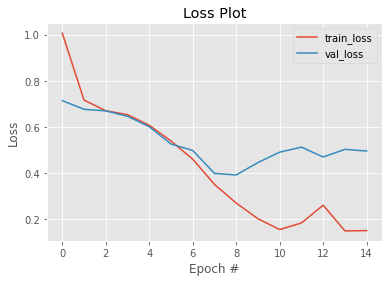

In [37]:
%matplotlib inline

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

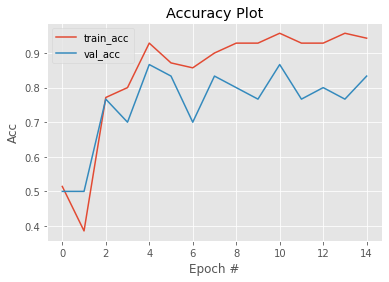

In [38]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [39]:
pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      0.93      0.85        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



### **Save Model Data Ke H5**

In [41]:

model.save('/tmp/Model.h5')
print('Model Saved!')

savedModel=load_model('/tmp/Model.h5')
savedModel.summary()

Model Saved!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 